### Where is the data ? How does it look like?

[The data is available here on GitHub](https://drive.google.com/drive/folders/1CujnTxmaUATHlQvpjxwbdZxNEpJOygq8?usp=sharing) ||
[or here on Gdrive](https://drive.google.com/drive/folders/1CujnTxmaUATHlQvpjxwbdZxNEpJOygq8?usp=sharing)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', -1)
data = pd.read_csv('./../../project_watson/data/train.csv').set_index('id')

In [3]:
data.head(3)

,premise,hypothesis,lang_abv,language,label
id,,,,,
5130fd2cb5,and these comments were considered in formulating the interim rules.,The rules developed in the interim were put together with these comments in mind.,en,English,0
5b72532a0b,"These are issues that we wrestle with in practice groups of law firms, she said.",Practice groups are not permitted to work on these issues.,en,English,2
3931fbe82a,Des petites choses comme celles-là font une différence énorme dans ce que j'essaye de faire.,J'essayais d'accomplir quelque chose.,fr,French,0


In [4]:
pd.DataFrame(data.loc['ed9d9e8ec2', ['premise','hypothesis', 'label']])

,ed9d9e8ec2
premise,"Well, we've just got to get down to it, that's all."
hypothesis,We should take a break from this.
label,2


### What are we manipulating? What is the goal ?

#### ========= THE X ========= 

The features in the dataset are:
 - the `id`
 - the `premise`
 - the `hypothesis`
 - the `lang_abv`
 - the `language`
 
We have **12 120** observations in the training set. 

The main thing is to understand that for each observation we<br> have a <font color=blue>**pair of 1 premise and 1 hypothesis**</font>
 - Premises and hypotheses are text
 - Each pair (premise, hypothesis)
 
<font color=blue>The goal is to understand how these 2 pieces of text relate to each other</font>

#### ========= THE y ========= 

This is a **classification** project. The target can have 3 labels :
 - `0`: means that the _premise_ and the _hypothesis_ strongly **agree** with each other 
<br> you could see it as _synonym sentences_

 - `1`: means that the _premise_ and the _hypothesis_ are not much related 
 <br>you could see it as _neutral sentences_

 - `2`: means that the _premise_ and the _hypothesis_ are  **opposed** 
 <br> you could see it as _antonym sentences_

In [5]:
pd.DataFrame(data.loc['e70456a114', ['premise','hypothesis', 'label']])

,e70456a114
premise,The story of the technology business gets spiced up because the reality is so bland.
hypothesis,Reality is so bland that the technology business gets spiced up.
label,0


In [6]:
pd.DataFrame(data.loc['39ea2c1e23', ['premise','hypothesis', 'label']])

,39ea2c1e23
premise,"-concevoir, dessiner et coudre à la main tous ces costumes magnifiques tels que les robes d'époque de Mary Todd à Abe Lincoln en Illinois et les robes de bal dans A Christmas Carol."
hypothesis,Les costumes n'étaient travaillés que par des mains humaines.
label,1


In [7]:
pd.DataFrame(data.loc['ed9d9e8ec2', ['premise','hypothesis', 'label']])

,ed9d9e8ec2
premise,"Well, we've just got to get down to it, that's all."
hypothesis,We should take a break from this.
label,2


### Quick EDA

Clean dataset, there is **no missing value and no duplicates**

<img src="report-snippet 1.png" alt="Overview" title="Overview" />
<img src="report-snippet 2.png" alt="No NaNs" title="No NaNs" />

In [9]:
"""from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='report.html')"""

"from pandas_profiling import ProfileReport\nprof = ProfileReport(data)\nprof.to_file(output_file='report.html')"

In [10]:
X, y = data.drop(columns=['label']), data.label

In [11]:
print(f'The shape of X is : ', X.shape)
print(f'The columns of X are : ', X.columns)
print()
print(f'The shape of y is : ', y.shape)
print(f'The labels of y are :', list(np.unique(y)))

The shape of X is :  (12120, 4)
The columns of X are :  Index(['premise', 'hypothesis', 'lang_abv', 'language'], dtype='object')

The shape of y is :  (12120,)
The labels of y are : [0, 1, 2]


**Text len distribution**

In [12]:
prem_dict = {}
for p in data['premise']:
    if len(p) not in prem_dict:
        prem_dict[len(p)] = 1
    prem_dict[len(p)] += 1
    
hyp_dict = {}
for h in data['hypothesis']:
    if len(h) not in hyp_dict:
        hyp_dict[len(h)] = 1
    hyp_dict[len(h)] += 1

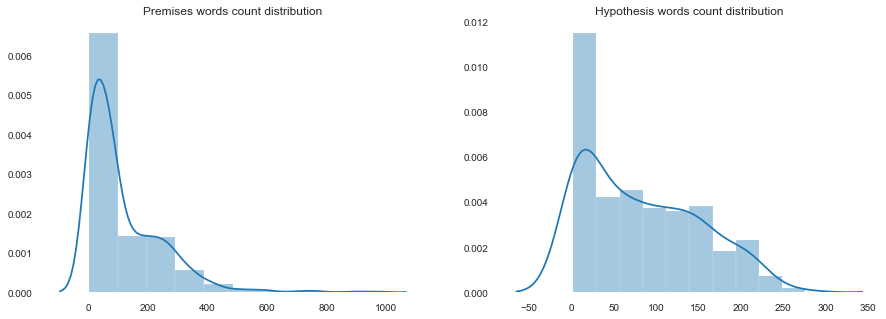

In [13]:
import seaborn as sns
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# distribution on Premises
sns.distplot(pd.DataFrame.from_dict(prem_dict, orient='index').sort_index().reset_index(), bins=10, ax=axs[0])
axs[0].set_title('Premises words count distribution')

# distribution on Hypothesis
sns.distplot(pd.DataFrame.from_dict(hyp_dict, orient='index').sort_index().reset_index(), bins=10, ax=axs[1])
axs[1].set_title('Hypothesis words count distribution')
plt.show()

**Language split**

In [14]:
"""fig = plt.figure(figsize=(15,5))
plt.bar(data['language'].value_counts(normalize=True).index, data['language'].value_counts(normalize=True).values)
plt.title('Split in %age of the X between language')
plt.show()"""

AbstractMethodError: This method must be defined in the concrete class type

<Figure size 1080x360 with 0 Axes>

In [24]:
"""data_non_en = data[data['language'] != 'English']
fig = plt.figure(figsize=(15,5))
plt.bar(data_non_en['language'].value_counts().index, data_non_en['language'].value_counts().values)
plt.title('Split in %age of the X between language WITHOUT ENGLISH')
plt.show()"""

"data_non_en = data[data['language'] != 'English']\nfig = plt.figure(figsize=(15,5))\nplt.bar(data_non_en['language'].value_counts().index, data_non_en['language'].value_counts().values)\nplt.title('Split in %age of the X between language WITHOUT ENGLISH')\nplt.show()"

### Plan to tackle the project and potential complications

**BERT** model https://medium.com/analytics-vidhya/bert-for-everyone-f876f3bd3383

**Complications** : maybe some char recognition in foreign alphabets ? reliability of the input data ? sometimes there is no clear cut between 1 and one alternative value